<a href="https://colab.research.google.com/github/dhruv21csu155/FOREST-FIRE-DETECTION-AND-PREVENTION-SYSTEM-Project/blob/main/FOREST%20FIRE%20DETECTION%20AND%20PREVENTION%20SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inroduction to Internet of Applications

##Dhruv Agarwal 21CSU155



In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_df = pd.read_csv('forestfires (1).csv')
data_df.head()

In [ ]:
data_df = data_df.drop(['month' , 'day'] ,axis = 1)
data_df.shape

(517, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler



# Splitting the dataset 70/30

train_df = data_df.sample(frac=0.7, random_state=25)
test_df = data_df.drop(train_df.index)

df_train = train_df
df_test = test_df

# Normalizing the dataset
scaler = StandardScaler()
train_df = scaler.fit_transform(train_df)
test_df = scaler.fit_transform(test_df)
print(train_df[0])

[ 1.03572896  0.0552465  -1.40799552 -0.8137053   0.49765771 -1.6474761
  0.4135106   1.51131852  1.41981881 -0.10016312 -0.03036302]


In [ ]:
# preparing train and test datasets
train_x = np.delete(train_df, 10, 1)
train_y = train_df[:, 10]
test_x = np.delete(test_df, 10, 1)
test_y = test_df[:, 10]
#print(train_x[0] , train_y[0])
print(train_x.shape , train_y.shape)
features = ['X' , 'Y' , 'FFMC' , 'DMC' , 'DC' , 'ISI' , 'temp' , 'RH' , 'wind' , 'Rain' ]

(362, 10) (362,)


In [ ]:
# function to print the MSE and R2 score
def print_mse_r2(model_name, y_pred, test_y):
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    mse = mean_squared_error(y_pred, test_y)
    r2 = r2_score(test_y, y_pred)
    print('-'*100)
    print(f"{model_name} MSE: ", mse)
    print(f"{model_name} R2 score: ", r2)
    print('-'*100)

# function to get the feature weight/importance
def feature_importance(model_name, coef):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10, 6), dpi=80)
    ax = sns.barplot(x = features, y = coef)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.title(f"Feature Importance in {model_name}")
    plt.show()

## Linear Regression
In this section we do linear Regression on the data. Note that we don't cluster the data on the basis of state and then perform the linear regression on the data. This might be appealing to do, but because of less number of counties in a state, the models might overfit and might not give a wholistic picture of the USA vaccination disparities.

----------------------------------------------------------------------------------------------------
Linear Regression MSE:  0.9682828670178171
Linear Regression R2 score:  0.031717132982182816
----------------------------------------------------------------------------------------------------


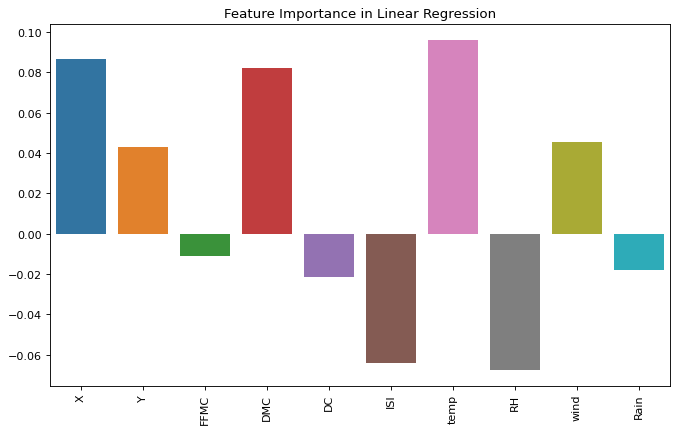

In [ ]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression().fit(train_x, train_y)
lr_pred = lr_reg.predict(test_x)
print_mse_r2('Linear Regression', lr_pred, test_y)
feature_importance('Linear Regression', lr_reg.coef_)

## Decision Tree Regression
We fit the decision tree regressor to minimize the entropy at every level and maximize the information gain. We also plot the tree to check the semantics of the learnt model.

----------------------------------------------------------------------------------------------------
Decision Tree Regressor MSE:  4.411106717604932
Decision Tree Regressor R2 score:  -3.411106717604933
----------------------------------------------------------------------------------------------------


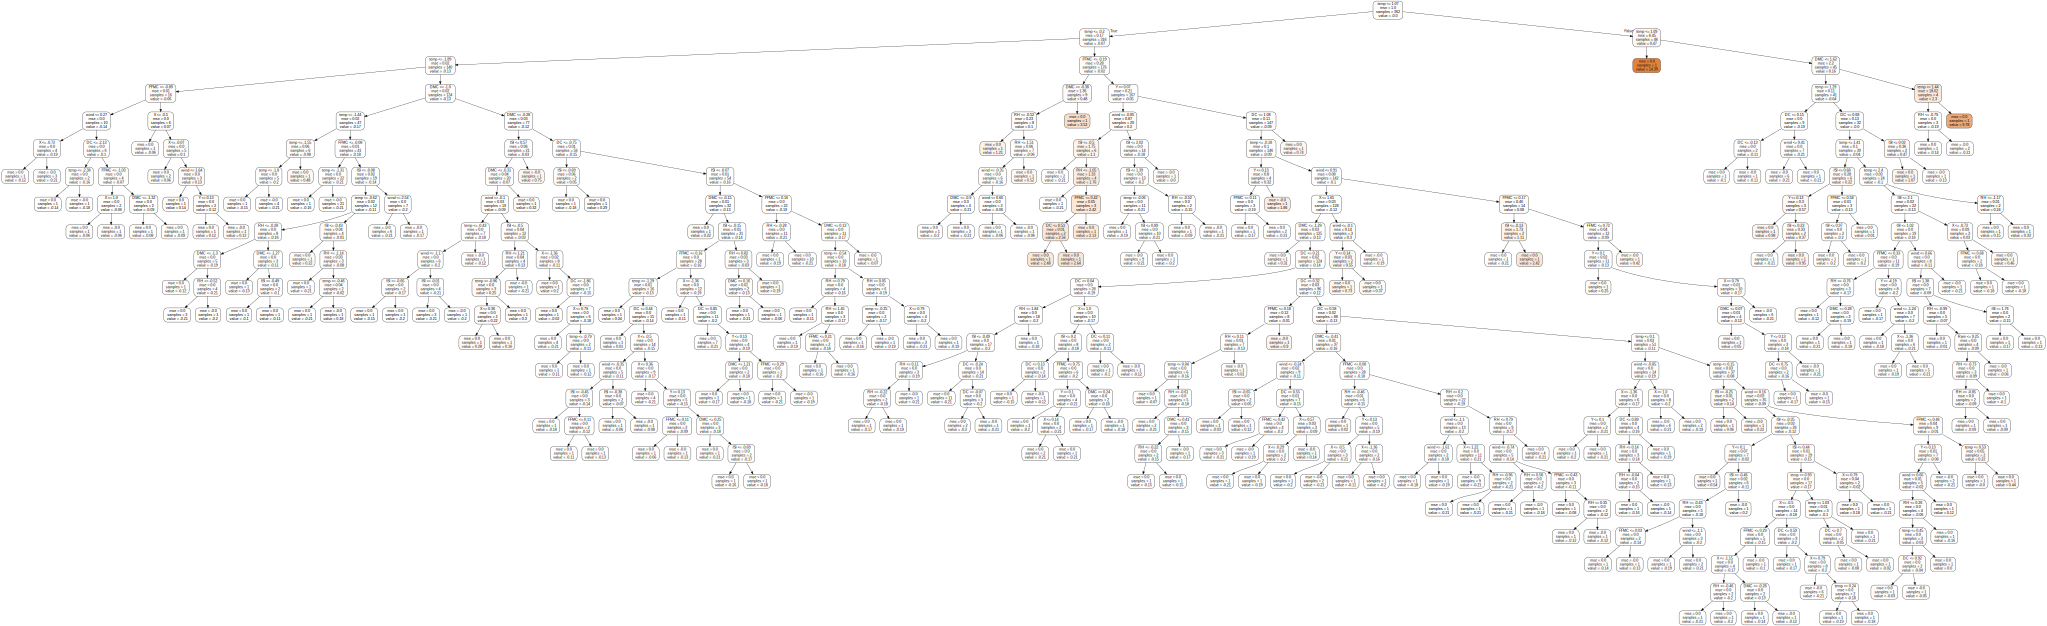

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz

dt_reg = DecisionTreeRegressor(random_state=0).fit(train_x, train_y)
dt_pred = dt_reg.predict(test_x)
print_mse_r2('Decision Tree Regressor', dt_pred, test_y)

dot_data = export_graphviz(dt_reg, out_file=None, feature_names = features, rounded = True, proportion = False, precision = 2, filled = True)

# Draw decision tree
graph = graphviz.Source(dot_data, format="png")
graph

## Random Forest Regression
Just like decision tree, this is an ensemble of many such trees.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=3, random_state=142).fit(train_x, train_y)
rf_pred = rf_reg.predict(test_x)
print_mse_r2('Random Forest Regressor', rf_pred, test_y)

----------------------------------------------------------------------------------------------------
Random Forest Regressor MSE:  1.6347901236315105
Random Forest Regressor R2 score:  -0.6347901236315108
----------------------------------------------------------------------------------------------------


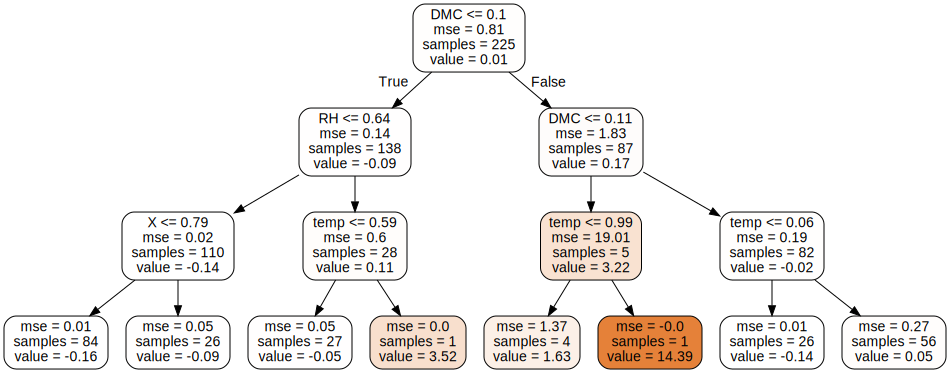

In [ ]:
import os
from sklearn.tree import export_graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'

export_graphviz(rf_reg.estimators_[5], out_file='tree.dot', feature_names = features, rounded = True, proportion = False, precision = 2, filled = True)

import graphviz
from IPython.display import display
with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

# fit SVR models with different kernels
svr_rbf = SVR(kernel='rbf', C=1, epsilon=0.1).fit(train_x, train_y)
svr_lin = SVR(kernel='linear', C=1).fit(train_x, train_y)
svr_pol = SVR(kernel='poly', C=1, epsilon=0.1, coef0=1).fit(train_x, train_y)
svr_sig = SVR(kernel='sigmoid', C=1, epsilon=0.1, coef0=1).fit(train_x, train_y)

# make predictions
svr_rbf_pred = svr_rbf.predict(test_x)
svr_lin_pred = svr_lin.predict(test_x)
svr_pol_pred = svr_pol.predict(test_x)
svr_sig_pred = svr_sig.predict(test_x)

----------------------------------------------------------------------------------------------------
SVM (Gaussian Kernel) MSE:  1.0089083365099936
SVM (Gaussian Kernel) R2 score:  -0.008908336509993786
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
SVM (Linear Kernel) MSE:  1.011727079771092
SVM (Linear Kernel) R2 score:  -0.01172707977109222
----------------------------------------------------------------------------------------------------


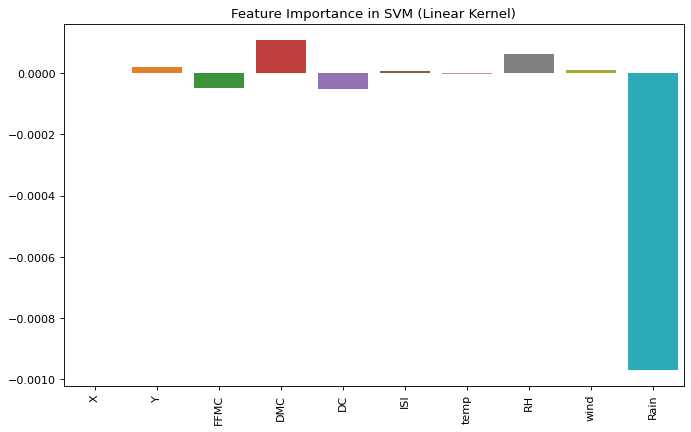

----------------------------------------------------------------------------------------------------
SVM (Polynomial Kernel) MSE:  1.0347486814043503
SVM (Polynomial Kernel) R2 score:  -0.0347486814043505
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
SVM (Sigmoid Kernel) MSE:  68.44642969177093
SVM (Sigmoid Kernel) R2 score:  -67.44642969177094
----------------------------------------------------------------------------------------------------


In [ ]:
print_mse_r2('SVM (Gaussian Kernel)', svr_rbf_pred, test_y)

# note: coefficients, and therefore weights/importance of each feature is only possible in linear kernel
print_mse_r2('SVM (Linear Kernel)', svr_lin_pred, test_y)
feature_importance('SVM (Linear Kernel)', svr_lin.coef_.tolist()[0])

print_mse_r2('SVM (Polynomial Kernel)', svr_pol_pred, test_y)

print_mse_r2('SVM (Sigmoid Kernel)', svr_sig_pred, test_y)

## Multi-Layer Perceptron Regression
We define 5-layer perceptron with 3 hidden layers and same activation - logistic, we tried ReLU and tanh too, out of which logistic gave the best performance

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_reg_log = MLPRegressor(hidden_layer_sizes=[16, 8, 4], random_state=1, max_iter=500, activation='logistic').fit(train_x, train_y)
mlp_pred = mlp_reg_log.predict(test_x)
print_mse_r2('MLP Regressor (logistic)', mlp_pred, test_y)

----------------------------------------------------------------------------------------------------
MLP Regressor (logistic) MSE:  0.999273418302652
MLP Regressor (logistic) R2 score:  0.000726581697347739
----------------------------------------------------------------------------------------------------


In [ ]:
mlp_reg_rel = MLPRegressor(hidden_layer_sizes=[16, 8, 4], random_state=1, max_iter=500, activation='relu').fit(train_x, train_y)
mlp_pred = mlp_reg_rel.predict(test_x)
print_mse_r2('MLP Regressor (relu)', mlp_pred, test_y)

----------------------------------------------------------------------------------------------------
MLP Regressor (relu) MSE:  0.8029219988609742
MLP Regressor (relu) R2 score:  0.19707800113902574
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp_reg_sig = MLPRegressor(hidden_layer_sizes=[16, 8, 4], random_state=1, max_iter=500, activation='tanh').fit(train_x, train_y)
mlp_pred = mlp_reg_sig.predict(test_x)
print_mse_r2('MLP Regressor (tanh)', mlp_pred, test_y)

----------------------------------------------------------------------------------------------------
MLP Regressor (tanh) MSE:  0.9564710303734724
MLP Regressor (tanh) R2 score:  0.043528969626527414
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Ridge Regression
Just the linear regression with added L2-regularization

----------------------------------------------------------------------------------------------------
Ridge Regression MSE:  0.9682825392549154
Ridge Regression R2 score:  0.031717460745084414
----------------------------------------------------------------------------------------------------


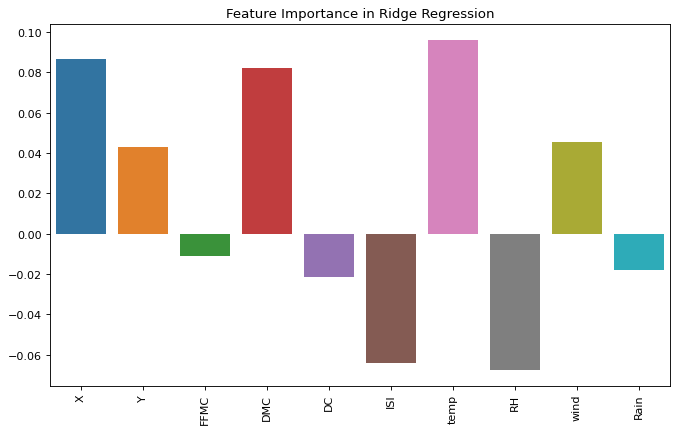

In [ ]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=0.1).fit(train_x, train_y)
ridge_pred = ridge_reg.predict(test_x)
print_mse_r2("Ridge Regression", ridge_pred, test_y)
feature_importance('Ridge Regression', lr_reg.coef_)

    ## Lasso Regression
L1-regularized linear regression

----------------------------------------------------------------------------------------------------
Lasso Regression MSE:  0.9982909232045704
Lasso Regression R2 score:  0.0017090767954295316
----------------------------------------------------------------------------------------------------


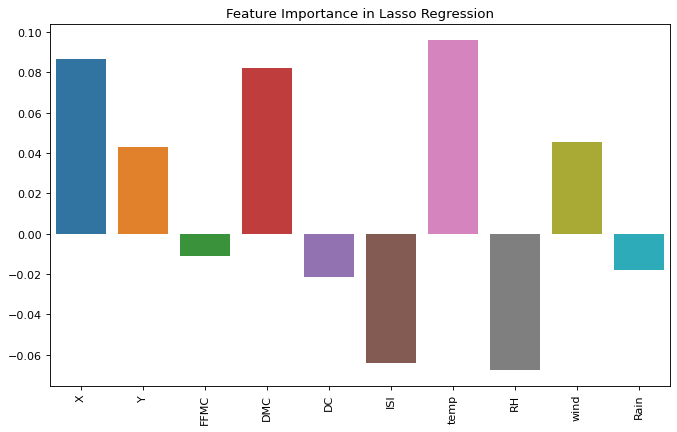

In [ ]:
ridge_reg = linear_model.Lasso(alpha=0.1).fit(train_x, train_y)
ridge_pred = ridge_reg.predict(test_x)
print_mse_r2("Lasso Regression", ridge_pred, test_y)
feature_importance('Lasso Regression', lr_reg.coef_)

## Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
nn_reg = Sequential()

# Adding the input layer and the first hidden layer
nn_reg.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'leaky_relu', input_dim = 10))

# Adding the second hidden layer
nn_reg.add(Dense(units = 15, kernel_initializer = 'random_normal', activation = 'leaky_relu'))

# Adding the third hidden layer
nn_reg.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'linear'))

# Adding the output layer
nn_reg.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

# Compiling the ANN
nn_reg.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

# Fitting the ANN to the Training set
nn_reg.fit(train_x, train_y, batch_size = 16, epochs = 50, verbose=0)

In [ ]:
nn_pred = nn_reg.predict(test_x)
print_mse_r2('Custom Neural Network', nn_pred, test_y)

----------------------------------------------------------------------------------------------------
Custom Neural Network MSE:  0.9196091580243312
Custom Neural Network R2 score:  0.08039084197566859
----------------------------------------------------------------------------------------------------


# Data Analysis
Apart from applying ML techniques to see the latent patterns in the data and correlation between the variables, we will also perform some statistical operations/plotting to see how the variables correlate to each other. As we mentioned in the report, the correlation of variable is quite similar to that in the reference paper.

In [ ]:
train_df

array([[-0.71665262,  0.10586441,  0.17137949, ..., -0.48709908,
        -0.07246039, -0.20844379],
       [ 0.14238132,  0.10586441,  0.366523  , ...,  1.30475729,
        -0.07246039, -0.14943286],
       [ 1.43093222,  0.16860389, -0.02376402, ..., -0.99105868,
        -0.07246039, -0.20844379],
       ...,
       [ 1.43093222,  0.16860389,  0.22016537, ..., -0.99105868,
        -0.07246039, -0.20844379],
       [-1.14616959,  0.06403687,  0.18764145, ...,  0.29683809,
        -0.07246039, -0.20844379],
       [-0.28713565,  0.10586441, -0.54414672, ..., -1.21504073,
        -0.07246039, -0.20844379]])

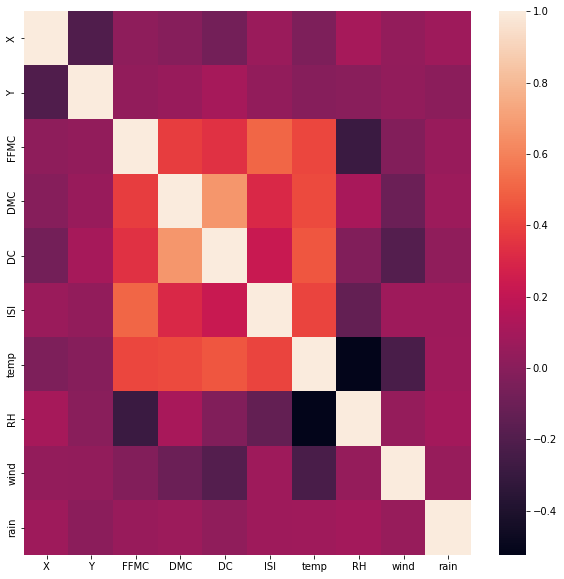

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10,10)


sns.heatmap(df_train.drop(['area'], axis = 1 ).corr())
plt.show()

# Pair Plotting
To know more about the distribution and correlation of dataset, we pair-plotted the features in a matrix.

In [ ]:
df_train.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
454,35.72648,32.36573,91.6,248.4,753.8,6.3,16.8,56,3.1,0.0,0.00
319,35.80148,32.36573,92.8,119.0,783.5,7.5,21.6,28,6.3,0.0,4.41
297,35.91398,32.53716,90.4,89.5,290.8,6.4,15.4,45,2.2,0.0,0.00
322,35.83898,32.48002,92.8,119.0,783.5,7.5,16.8,28,4.0,0.0,1.01
206,35.68898,32.25144,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45


<Figure size 360x1440 with 0 Axes>

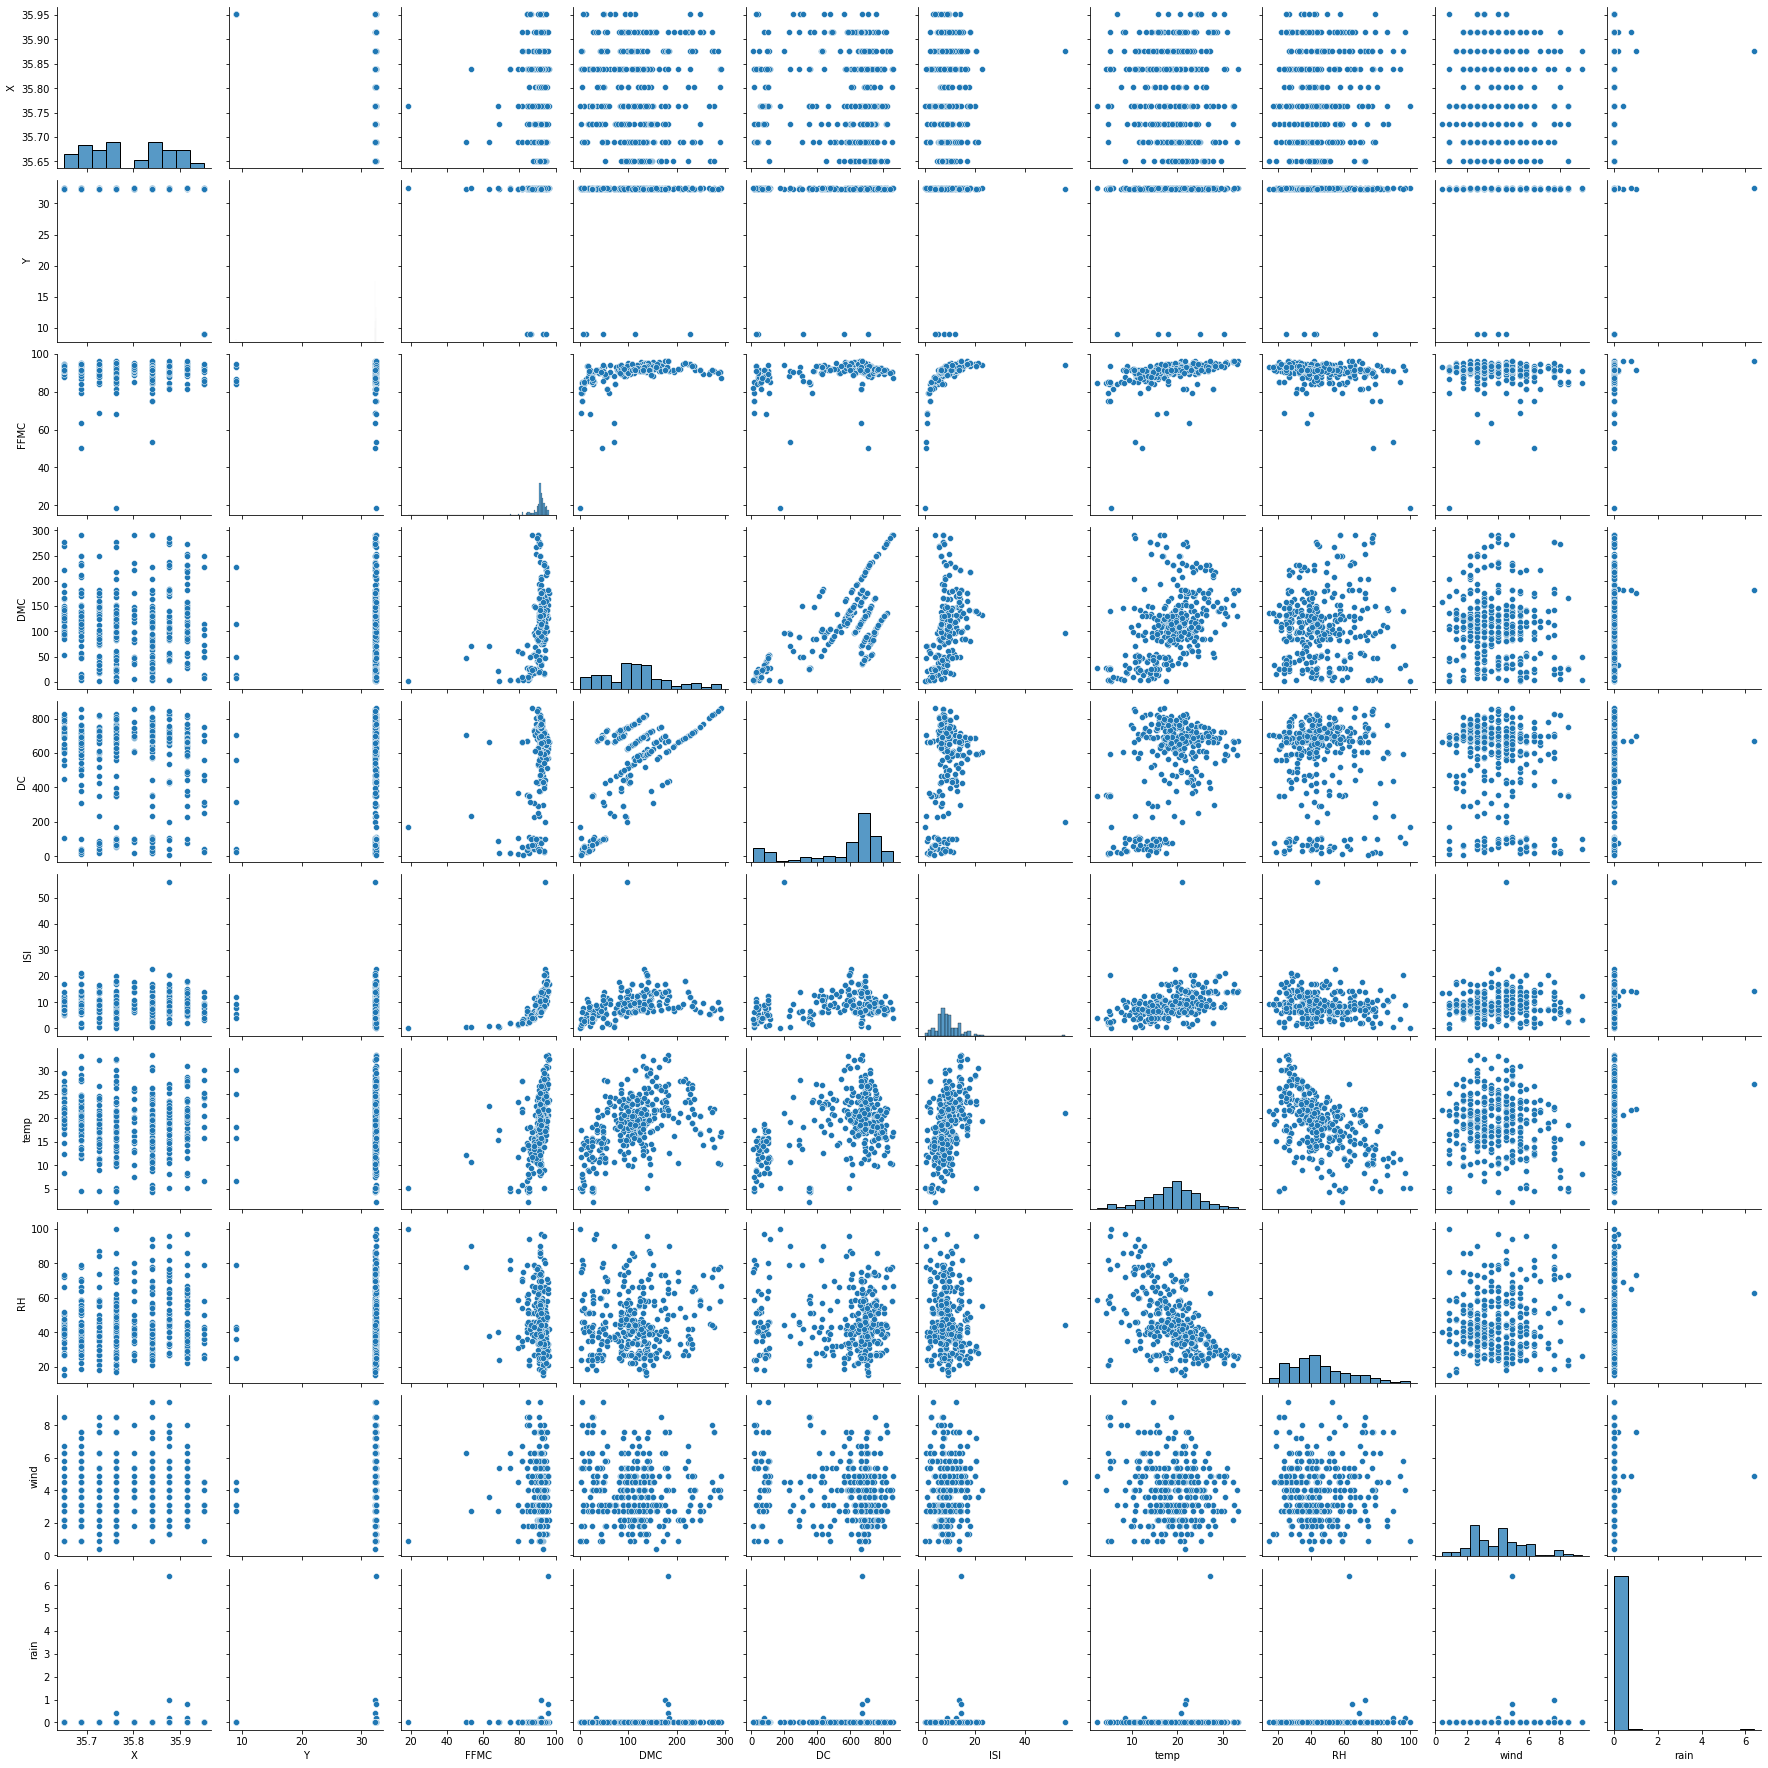

In [ ]:
fig = plt.gcf()
fig.set_size_inches(5,20)

g = sns.pairplot(df_train.drop(['area'] , axis = 1 )[['X' , 'Y' , 'FFMC' , 'DMC' , 'DC' , 'ISI' , 'temp' , 'RH' , 'wind' , 'rain' ]])
plt.show()